# Social Services

In [2]:
import pandas as pd
import geopandas
import numpy as np
import matplotlib.pyplot as plt
import fpsnippets

In [3]:
social = pd.read_csv("socialServices.csv")
pop = pd.read_csv("neighborhood_population.csv")

<Axes: >

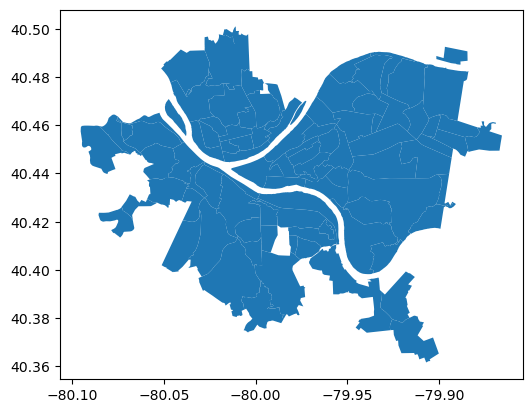

In [4]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.head(10)
neighborhoods.plot()

In [5]:
latitude = social['latitude']
longitude = social['longitude']
test = social['neighborhood']
index = 0
while index < social['neighborhood'].count():
    #print(latitude[index])
    #print(longitude[index])
    townName = fpsnippets.geo_to_neighborhood(float(latitude[index]), float(longitude[index]))
    if townName != 'None':
        social.loc[social['_id'] == index + 1, "neighborhood"] = townName
    index = index + 1

In [6]:
social = social.replace(["Downtown", "Uptown"], ["Central Business District", "Bluff"])
servicesNeighborhoods = social.groupby("neighborhood").count()
#print(servicesNeighborhoods)

,hood,_id,geometry
5,Central Business District,20.0,"POLYGON ((-79.99238 40.44484, -79.99233 40.444..."
16,Bluff,13.0,"POLYGON ((-79.9939 40.43893, -79.99381 40.4389..."
25,Central Northside,12.0,"POLYGON ((-80.00858 40.46004, -80.00856 40.459..."
13,South Side Flats,10.0,"POLYGON ((-79.97726 40.43274, -79.97725 40.432..."
3,Crawford-Roberts,9.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."


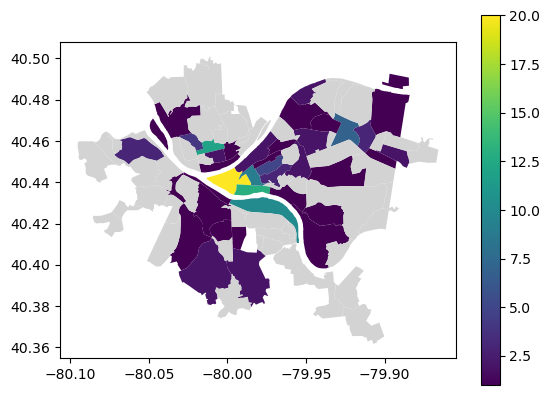

In [7]:
socialMap = neighborhoods.merge(servicesNeighborhoods, how = "left", left_on = "hood", right_on = "neighborhood")
socialMap = socialMap.sort_values(by = '_id', ascending = False)
socialMap.plot(column="_id", legend = True, missing_kwds = {'color':'lightgrey'})
socialMap[['hood', '_id', 'geometry']].head()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]),
 [Text(0, 0, 'Central Business District'),
  Text(1, 0, 'Bluff'),
  Text(2, 0, 'Central Northside'),
  Text(3, 0, 'South Side Flats'),
  Text(4, 0, 'Crawford-Roberts'),
  Text(5, 0, 'East Liberty'),
  Text(6, 0, 'Middle Hill'),
  Text(7, 0, 'California-Kirkbride'),
  Text(8, 0, 'Sheraden'),
  Text(9, 0, 'Larimer'),
  Text(10, 0, 'Terrace Village'),
  Text(11, 0, 'Carrick'),
  Text(12, 0, 'Strip District'),
  Text(13, 0, 'North Oakland'),
  Text(14, 0, 'Bloomfield'),
  Text(15, 0, 'Upper Lawrenceville'),
  Text(16, 0, 'Homewood South'),
  Text(17, 0, 'Allegheny Center'),
  Text(18, 0,

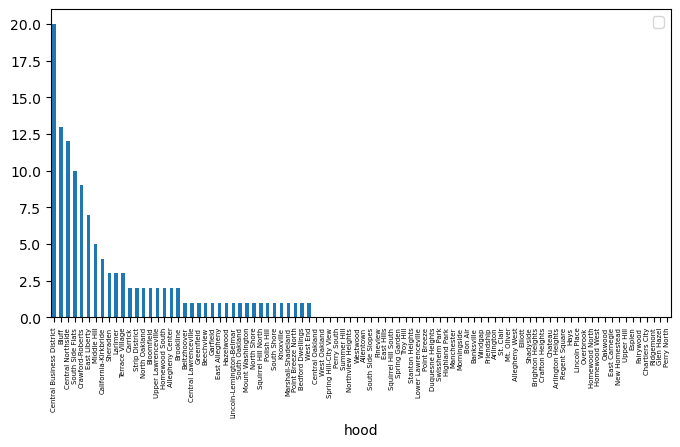

In [8]:
socialMap.plot.bar(x = "hood", y = "_id", figsize=(8,4))
plt.xticks(size = 5)

In [9]:
#merge 2020 population with socialMap
population = pop[["Neighborhood", "2020_Total_Population"]]
socialMap = socialMap.merge(population, how = 'left', left_on = "hood", right_on = 'Neighborhood')

In [10]:
#normalize data
socialMap['servicePerPerson'] = socialMap['_id']/socialMap['2020_Total_Population']
socialMap['normalize'] = (socialMap['servicePerPerson']-socialMap['servicePerPerson'].min())/(socialMap['servicePerPerson'].max()-socialMap['servicePerPerson'].min())
socialMap['normalize'] = socialMap['normalize'] * 100
socialMap[['hood', '_id', 'normalize', '2020_Total_Population', 'servicePerPerson']].head(20)

,hood,_id,normalize,2020_Total_Population,servicePerPerson
0,Central Business District,20.0,NaN,NaN,NaN
1,Bluff,13.0,6.180344,5882.0,0.002210
2,Central Northside,12.0,11.493217,2972.0,0.004038
3,South Side Flats,10.0,3.648534,7467.0,0.001339
4,Crawford-Roberts,9.0,11.165598,2293.0,0.003925
5,East Liberty,7.0,3.044377,6187.0,0.001131
6,Middle Hill,5.0,8.028174,1757.0,0.002846
7,California-Kirkbride,4.0,16.156386,709.0,0.005642
8,Sheraden,3.0,1.449716,5147.0,0.000583
9,Larimer,3.0,5.400123,1545.0,0.001942


<Axes: xlabel='hood'>

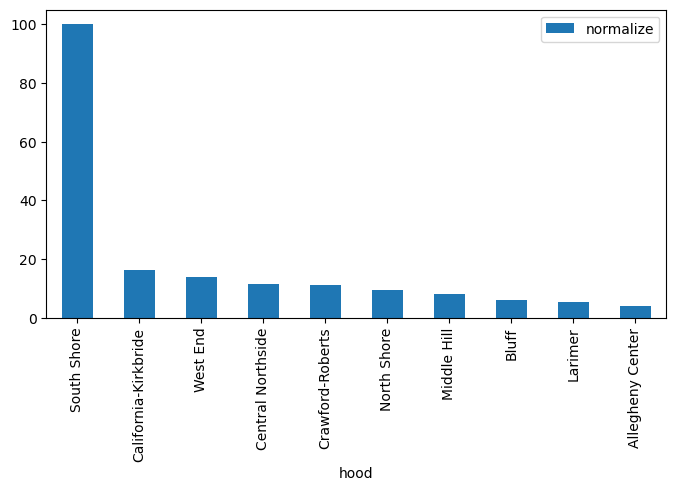

In [11]:
sorted = socialMap.sort_values(by = 'servicePerPerson', ascending = False)
sorted.iloc[0:10].plot(kind = 'bar', x = "hood", y = "normalize", figsize=(8,4))

In [12]:
sorted[['hood', 'normalize']].head()

,hood,normalize
32,South Shore,100.000000
7,California-Kirkbride,16.156386
37,West End,13.936235
2,Central Northside,11.493217
4,Crawford-Roberts,11.165598
